<p class="pull-left">
COMP 162 - Analytics Computing
</p>
<div class="pull-right">
<ul class="list-inline">
Copyright © Dana Nehoran 2017
</ul>
</div>

# <font color='navy' size=6>Clustering with K-means</font>


In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage, dendrogram
 
import pandas as pd
import numpy as np

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)
 
%matplotlib inline

# 0) Data

In [6]:
birds = np.array([1, 3, 2, 4, 4, 2, 7, 12, 4, 3, 10, 16, 17, 13, 
                  7, 19, 13, 10, 16, 12, 5, 5, 3, 2, 18, 10, 19, 
                  7, 4, 8, 3, 9, 4, 14, 10, 14, 7, 15, 9, 18, 6, 
                  17, 15, 9]).reshape(22, -1)
birds

array([[ 1,  3],
       [ 2,  4],
       [ 4,  2],
       [ 7, 12],
       [ 4,  3],
       [10, 16],
       [17, 13],
       [ 7, 19],
       [13, 10],
       [16, 12],
       [ 5,  5],
       [ 3,  2],
       [18, 10],
       [19,  7],
       [ 4,  8],
       [ 3,  9],
       [ 4, 14],
       [10, 14],
       [ 7, 15],
       [ 9, 18],
       [ 6, 17],
       [15,  9]])

In [8]:
bird_df = pd.DataFrame(birds)
bird_df.columns = ["Wings", "Length"]
bird_df

    Wings  Length
0       1       3
1       2       4
2       4       2
3       7      12
4       4       3
5      10      16
6      17      13
7       7      19
8      13      10
9      16      12
10      5       5
11      3       2
12     18      10
13     19       7
14      4       8
15      3       9
16      4      14
17     10      14
18      7      15
19      9      18
20      6      17
21     15       9

Text(0, 0.5, 'Length')

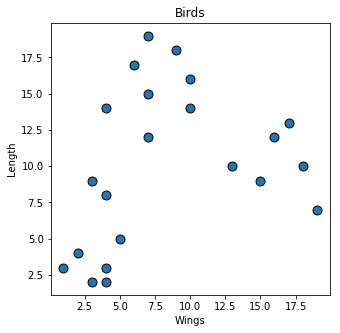

In [4]:
fig = plt.figure(figsize=(5,5))

plt.scatter(bird_df.Wings, bird_df.Length, edgecolor = 'black', s = 80)
plt.title('Birds')
plt.xlabel('Wings')
plt.ylabel('Length')

### Random Centroids

In [5]:
centroid1 = np.array([2,16])
centroid2 = np.array([8, 6])
centroid3 = np.array([10, 13])
print(centroid1, centroid2, centroid3)

[ 2 16] [8 6] [10 13]


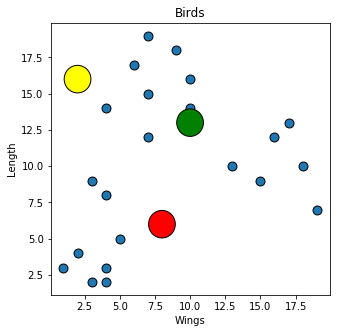

In [6]:
fig = plt.figure(figsize=(5,5))

plt.scatter(bird_df.Wings, bird_df.Length, edgecolor = 'black', s = 80)
plt.title('Birds')
plt.xlabel('Wings')
plt.ylabel('Length')
circle1 = plt.Circle(centroid1, radius=0.95, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.95, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.95, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)


# 1) First Iteration

In [7]:
bird_df["Dist_C1"] = np.sqrt((bird_df.Wings - centroid1[0])**2 
                             + (bird_df.Length - centroid1[1])**2)
bird_df["Dist_C2"] = np.sqrt((bird_df.Wings - centroid2[0])**2 + 
                             (bird_df.Length - centroid2[1])**2)
bird_df["Dist_C3"] = np.sqrt((bird_df.Wings - centroid3[0])**2 + 
                             (bird_df.Length - centroid3[1])**2)
bird_df

    Wings  Length    Dist_C1    Dist_C2    Dist_C3
0       1       3  13.038405   7.615773  13.453624
1       2       4  12.000000   6.324555  12.041595
2       4       2  14.142136   5.656854  12.529964
3       7      12   6.403124   6.082763   3.162278
4       4       3  13.152946   5.000000  11.661904
5      10      16   8.000000  10.198039   3.000000
6      17      13  15.297059  11.401754   7.000000
7       7      19   5.830952  13.038405   6.708204
8      13      10  12.529964   6.403124   4.242641
9      16      12  14.560220  10.000000   6.082763
10      5       5  11.401754   3.162278   9.433981
11      3       2  14.035669   6.403124  13.038405
12     18      10  17.088007  10.770330   8.544004
13     19       7  19.235384  11.045361  10.816654
14      4       8   8.246211   4.472136   7.810250
15      3       9   7.071068   5.830952   8.062258
16      4      14   2.828427   8.944272   6.082763
17     10      14   8.246211   8.246211   1.000000
18      7      15   5.099020   

### Associating Points to Centroids

In [8]:
bird_df["Association"] = np.where(
    (bird_df.Dist_C1 < bird_df.Dist_C2) & 
    (bird_df.Dist_C1 < bird_df.Dist_C3), 1, 
     np.where((bird_df.Dist_C2 < bird_df.Dist_C1) & 
    (bird_df.Dist_C2 < bird_df.Dist_C3) , 2, 3))
bird_df

    Wings  Length    Dist_C1    Dist_C2    Dist_C3  Association
0       1       3  13.038405   7.615773  13.453624            2
1       2       4  12.000000   6.324555  12.041595            2
2       4       2  14.142136   5.656854  12.529964            2
3       7      12   6.403124   6.082763   3.162278            3
4       4       3  13.152946   5.000000  11.661904            2
5      10      16   8.000000  10.198039   3.000000            3
6      17      13  15.297059  11.401754   7.000000            3
7       7      19   5.830952  13.038405   6.708204            1
8      13      10  12.529964   6.403124   4.242641            3
9      16      12  14.560220  10.000000   6.082763            3
10      5       5  11.401754   3.162278   9.433981            2
11      3       2  14.035669   6.403124  13.038405            2
12     18      10  17.088007  10.770330   8.544004            3
13     19       7  19.235384  11.045361  10.816654            3
14      4       8   8.246211   4.472136 

### Result of First Iteration

Text(0, 0.5, 'Length')

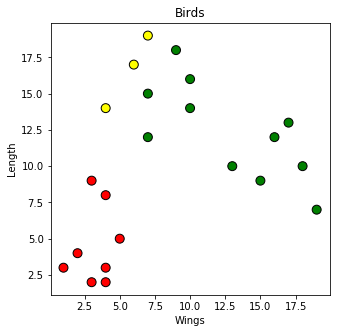

In [9]:
fig = plt.figure(figsize=(5,5))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
plt.scatter(bird_df.Wings, bird_df.Length, 
            c=colormap[bird_df.Association], edgecolor = 'black', s = 80)
plt.title('Birds')
plt.xlabel('Wings')
plt.ylabel('Length')

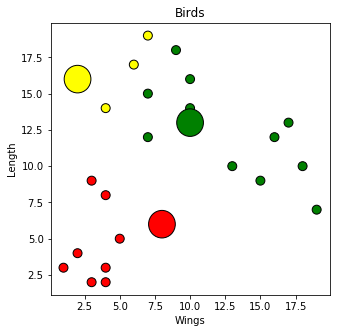

In [10]:
fig = plt.figure(figsize=(5,5))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
plt.scatter(bird_df.Wings, bird_df.Length, 
            c=colormap[bird_df.Association], edgecolor = 'black', s = 80)
plt.title('Birds')
plt.xlabel('Wings')
plt.ylabel('Length')
circle1 = plt.Circle(centroid1, radius=0.95, fc='yellow', edgecolor = 'black')
circle2 = plt.Circle(centroid2, radius=0.95, fc='red', edgecolor = 'black')
circle3 = plt.Circle(centroid3, radius=0.95, fc='green', edgecolor = 'black')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

In [11]:
bird_df[bird_df.Association == 1]

    Wings  Length   Dist_C1    Dist_C2   Dist_C3  Association
7       7      19  5.830952  13.038405  6.708204            1
16      4      14  2.828427   8.944272  6.082763            1
20      6      17  4.123106  11.180340  5.656854            1

In [12]:
bird_df[bird_df.Association == 2]

    Wings  Length    Dist_C1   Dist_C2    Dist_C3  Association
0       1       3  13.038405  7.615773  13.453624            2
1       2       4  12.000000  6.324555  12.041595            2
2       4       2  14.142136  5.656854  12.529964            2
4       4       3  13.152946  5.000000  11.661904            2
10      5       5  11.401754  3.162278   9.433981            2
11      3       2  14.035669  6.403124  13.038405            2
14      4       8   8.246211  4.472136   7.810250            2
15      3       9   7.071068  5.830952   8.062258            2

In [13]:
bird_df[bird_df.Association == 3]

    Wings  Length    Dist_C1    Dist_C2    Dist_C3  Association
3       7      12   6.403124   6.082763   3.162278            3
5      10      16   8.000000  10.198039   3.000000            3
6      17      13  15.297059  11.401754   7.000000            3
8      13      10  12.529964   6.403124   4.242641            3
9      16      12  14.560220  10.000000   6.082763            3
12     18      10  17.088007  10.770330   8.544004            3
13     19       7  19.235384  11.045361  10.816654            3
17     10      14   8.246211   8.246211   1.000000            3
18      7      15   5.099020   9.055385   3.605551            3
19      9      18   7.280110  12.041595   5.099020            3
21     15       9  14.764823   7.615773   6.403124            3

# 2) Second Iteration

### Recentering Centroids

In [14]:
centroid1 = bird_df[bird_df.Association == 1][["Wings", "Length"]].mean()
centroid1

Wings      5.666667
Length    16.666667
dtype: float64

In [15]:
centroid2 = bird_df[bird_df.Association == 2][["Wings", "Length"]].mean()
centroid2

Wings     3.25
Length    4.50
dtype: float64

In [16]:
centroid3 = bird_df[bird_df.Association == 3][["Wings", "Length"]].mean()
centroid3

Wings     12.818182
Length    12.363636
dtype: float64

### Plotting

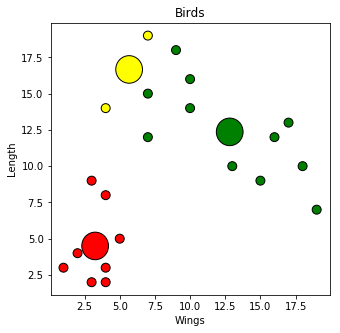

In [17]:
fig = plt.figure(figsize=(5,5))

# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
plt.scatter(bird_df.Wings, bird_df.Length, c=colormap[bird_df.Association], edgecolor = 'black', s = 80)
plt.title('Birds')

plt.title('Birds')
plt.xlabel('Wings')
plt.ylabel('Length')
circle1 = plt.Circle(centroid1, radius=0.95, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.95, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.95, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)


### Calculating Distances and Association for 2nd Iteration

In [18]:
bird_df["Dist_C1"] = np.sqrt((bird_df.Wings - centroid1[0])**2 + (bird_df.Length - centroid1[1])**2)
bird_df["Dist_C2"] = np.sqrt((bird_df.Wings - centroid2[0])**2 + (bird_df.Length - centroid2[1])**2)
bird_df["Dist_C3"] = np.sqrt((bird_df.Wings - centroid3[0])**2 + (bird_df.Length - centroid3[1])**2)
bird_df["Association"] = np.where((bird_df.Dist_C1 < bird_df.Dist_C2) & 
                                  (bird_df.Dist_C1 < bird_df.Dist_C3), 1, 
                                   np.where((bird_df.Dist_C2 < bird_df.Dist_C1) & 
                                  (bird_df.Dist_C2 < bird_df.Dist_C3) , 2, 3))
bird_df

    Wings  Length    Dist_C1    Dist_C2    Dist_C3  Association
0       1       3  14.441453   2.704163  15.078034            2
1       2       4  13.186694   1.346291  13.674190            2
2       4       2  14.761060   2.610077  13.607545            2
3       7      12   4.853407   8.385255   5.829534            1
4       4       3  13.767918   1.677051  12.862271            2
5      10      16   4.384315  13.334635   4.600575            1
6      17      13  11.911712  16.165163   4.229960            3
7       7      19   2.687419  14.977066   8.825676            1
8      13      10   9.910712  11.194307   2.370619            3
9      16      12  11.338234  14.792312   3.202530            3
10      5       5  11.685699   1.820027  10.739977            2
11      3       2  14.907120   2.512469  14.275912            2
12     18      10  14.019827  15.742061   5.695438            3
13     19       7  16.468826  15.947178   8.184343            3
14      4       8   8.825468   3.579455 

### Result of 2nd Iteration

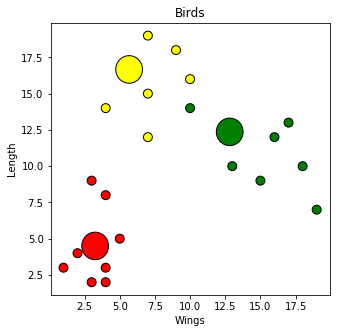

In [19]:
fig = plt.figure(figsize=(5,5))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
# Plot Sepal
plt.scatter(bird_df.Wings, bird_df.Length, c=colormap[bird_df.Association], edgecolor = 'black', s = 80)
plt.title('Birds')
plt.xlabel('Wings')
plt.ylabel('Length')
circle1 = plt.Circle(centroid1, radius=0.95, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.95, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.95, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

# 3) Third Iteration

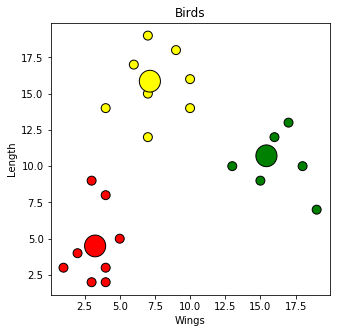

In [20]:
centroid1 = bird_df[bird_df.Association == 1][["Wings", "Length"]].mean()
centroid2 = bird_df[bird_df.Association == 2][["Wings", "Length"]].mean()
centroid3 = bird_df[bird_df.Association == 3][["Wings", "Length"]].mean()
bird_df["Dist_C1"] = np.sqrt((bird_df.Wings - centroid1[0])**2 + (bird_df.Length - centroid1[1])**2)
bird_df["Dist_C2"] = np.sqrt((bird_df.Wings - centroid2[0])**2 + (bird_df.Length - centroid2[1])**2)
bird_df["Dist_C3"] = np.sqrt((bird_df.Wings - centroid3[0])**2 + (bird_df.Length - centroid3[1])**2)
bird_df["Association"] = np.where((bird_df.Dist_C1 < bird_df.Dist_C2) & 
                                  (bird_df.Dist_C1 < bird_df.Dist_C3), 1, 
                                   np.where((bird_df.Dist_C2 < bird_df.Dist_C1) & 
                                  (bird_df.Dist_C2 < bird_df.Dist_C3) , 2, 3))
fig = plt.figure(figsize=(5,5))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
# Plot Sepal
plt.scatter(bird_df.Wings, bird_df.Length, c=colormap[bird_df.Association], edgecolor = 'black', s = 80)
plt.title('Birds')
plt.xlabel('Wings')
plt.ylabel('Length')
circle1 = plt.Circle(centroid1, radius=0.75, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.75, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.75, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

# 4) Fourth Iteration

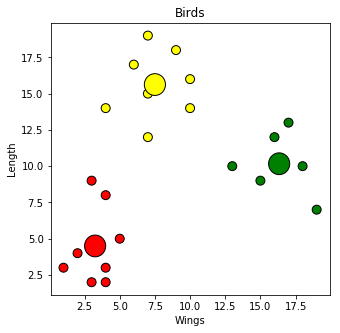

In [21]:
centroid1 = bird_df[bird_df.Association == 1][["Wings", "Length"]].mean()
centroid2 = bird_df[bird_df.Association == 2][["Wings", "Length"]].mean()
centroid3 = bird_df[bird_df.Association == 3][["Wings", "Length"]].mean()
bird_df["Dist_C1"] = np.sqrt((bird_df.Wings - centroid1[0])**2 + (bird_df.Length - centroid1[1])**2)
bird_df["Dist_C2"] = np.sqrt((bird_df.Wings - centroid2[0])**2 + (bird_df.Length - centroid2[1])**2)
bird_df["Dist_C3"] = np.sqrt((bird_df.Wings - centroid3[0])**2 + (bird_df.Length - centroid3[1])**2)
bird_df["Association"] = np.where((bird_df.Dist_C1 < bird_df.Dist_C2) & 
                                  (bird_df.Dist_C1 < bird_df.Dist_C3), 1, 
                                   np.where((bird_df.Dist_C2 < bird_df.Dist_C1) & 
                                  (bird_df.Dist_C2 < bird_df.Dist_C3) , 2, 3))
fig = plt.figure(figsize=(5,5))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
# Plot Sepal
plt.scatter(bird_df.Wings, bird_df.Length, c=colormap[bird_df.Association], edgecolor = 'black', s = 80)
plt.title('Birds')
plt.xlabel('Wings')
plt.ylabel('Length')
circle1 = plt.Circle(centroid1, radius=0.75, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.75, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.75, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

# 5) Using `KMeans()` Function

In [5]:
bird_df = pd.DataFrame(birds)
bird_df.columns = ["Wings", "Length"]
bird_df

NameError: name 'birds' is not defined

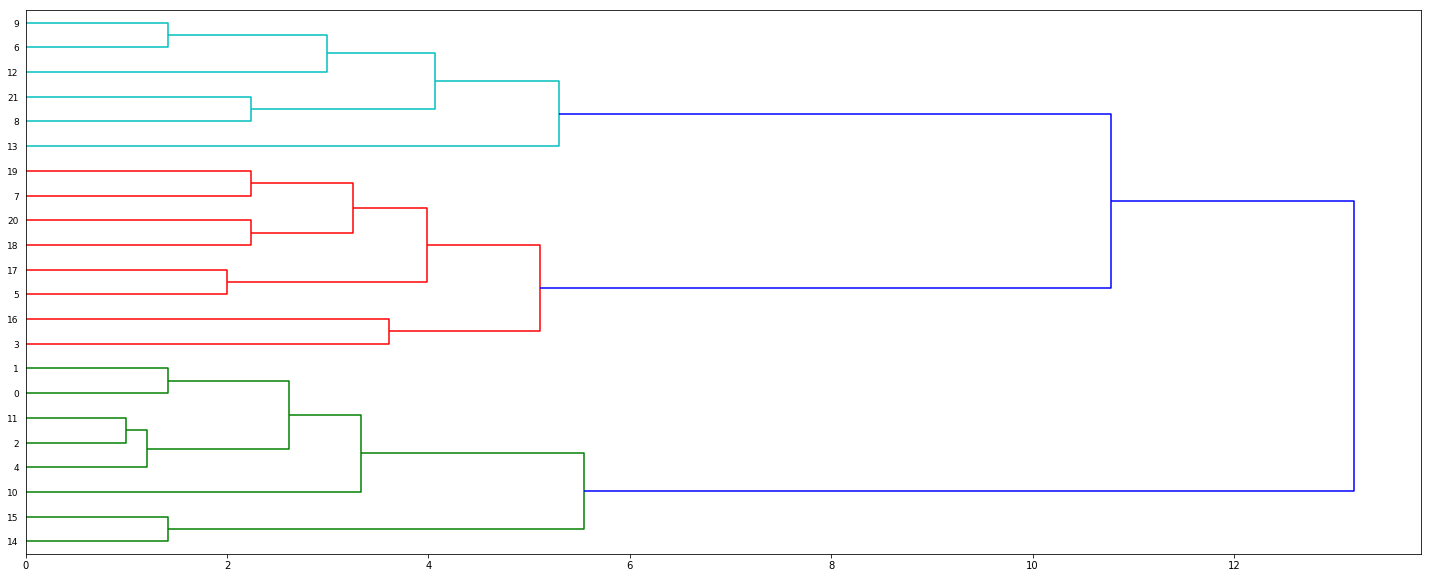

In [23]:
Z = linkage(bird_df, 'average')
plt.figure(figsize=(25, 10))
D = dendrogram(Z=Z, orientation="right", leaf_font_size=9, labels = bird_df.index)

In [24]:
# K Means Cluster
model = KMeans(n_clusters = 3)
model.fit(bird_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
model.labels_

array([1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2],
      dtype=int32)

Text(0, 0.5, 'Length')

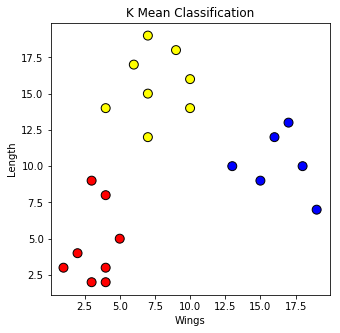

In [26]:
# View the results
# Set the size of the plot
fig = plt.figure(figsize=(5, 5))
 
# Create a colormap
colormap = np.array(['yellow', 'red', 'blue'])
 
plt.scatter(bird_df.Wings, bird_df.Length, c=colormap[model.labels_], edgecolor = 'black', s = 80)
plt.title('K Mean Classification')
plt.xlabel('Wings')
plt.ylabel('Length')

# 6) Using `KMeans()` Function with 5 Clusters

In [9]:
# K Means Cluster
model = KMeans(n_clusters=5)
model.fit(bird_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
model.labels_

array([1, 1, 1, 3, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 4, 4, 3, 3, 3, 2, 2, 0],
      dtype=int32)

Text(0, 0.5, 'Length')

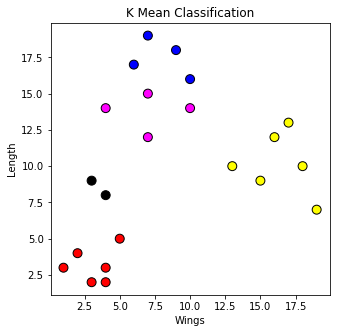

In [29]:
# View the results
# Set the size of the plot
fig = plt.figure(figsize=(5, 5))
 
# Create a colormap
colormap = np.array(['yellow', 'red', 'blue','magenta','black'])
 
plt.scatter(bird_df.Wings, bird_df.Length, c = colormap[model.labels_], edgecolor = 'black', s=80)
plt.title('K Mean Classification')
plt.xlabel('Wings')
plt.ylabel('Length')

# 7) Prediction Mesh

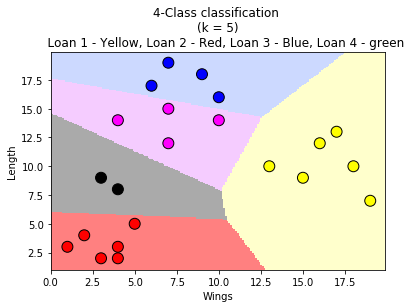

In [31]:
def plotMesh():
    h = 0.1
    # Create color maps
    cmap_light = ListedColormap(['#ffffcc', '#ff8080','#ccd9ff','#f5ccff','#aaaaaa'])
    colormap = np.array(['yellow', 'red', 'blue','magenta','black'])

    x_min, x_max = bird_df.Wings.min() - 1, bird_df.Wings.max() + 1
    y_min, y_max = bird_df.Length.min() - 1, bird_df.Length.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Plot also the training points
    plt.scatter(bird_df.Wings, bird_df.Length, c = colormap[model.labels_], edgecolor = 'black', s = 120)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("4-Class classification \n(k = %i)\n\
    Loan 1 - Yellow, Loan 2 - Red, Loan 3 - Blue, Loan 4 - green" % (5))
    plt.xlabel('Wings')
    plt.ylabel('Length')
plotMesh()

# 8) Prediction

In [11]:
colormap = np.array(['yellow', 'red', 'blue','magenta','black'])

wing = float(input('Wing Span (cm): '))
length = float(input('Length (cm): '))
data_class = model.predict(np.array([wing, length]).reshape(1, -1))[0]
colormap[data_class]

Wing Span (cm): 0
Length (cm): 0


'red'